In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer

from wordcloud import WordCloud

Duplicate key in file WindowsPath('c:/Users/god12/Anaconda3/envs/wassup/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  sans-serif')


In [8]:
#df = pd.read_csv('eng_pop.csv')
#df = pd.read_csv('eng_rock.csv')
#df = pd.read_csv('eng_folk.csv')
df = pd.read_csv('eng_hiphop.csv')
print(len(df))
df.head()

2729


,Title,Likes,Singer,Lyrics
0,Mood (Feat. Iann Dior),"86,003",24KGoldn,Why you always in a mood\nFuckin 'round actin'...
1,STAR WALKIN' (League of Legends Worlds Anthem),"33,295",Lil Nas X,Don’t ever say it’s over\nif I’m breathing\nRa...
2,Paint The Town Red,"22,360",Doja Cat,Bitch I said what I said\nI’d rather be famous...
3,Sunflower (Spider-Man: Into the Spider-Verse),"125,283",Post Malone,Ayy ayy ayy ayy Ooh\nOoh ooh ooh ooh Ooh\nAyy ...
4,"Surround Sound (Feat. 21 Savage, Baby Tate)","15,047",J.I.D,I know I can't afford to stop\nfor one moment\...


In [9]:
lyrics = df.Lyrics.to_list()
print(len(lyrics))
print(lyrics[0])

#file_name = 'eng_pop_text.txt'
#file_name = 'eng_rock_text.txt'
#file_name = 'eng_folk_text.txt'
file_name = 'eng_hiphop_text.txt'
with open(file_name, 'w', encoding = 'utf-8') as file:
    file.write('\n'.join(lyrics))

2729
Why you always in a mood
Fuckin 'round actin' brand new
I ain't tryna tell you what to do
But try to play it cool
Baby I ain't playing by your rules
Everything look better with a view
Why you always in a mood
Fuckin 'round actin' brand new
I ain't tryna tell you what to do
But try to play it cool
Baby I ain't playing by your rules
Everything look better with a view
I could never get attached
When I start to feel I unattach
Somehow always
end up feeling bad
Baby I am not your dad
it's not all you want from me
I just want your company
Girl it's obvious
elephant in the room
And we're a part of it
don't act so confused
And you love startin' it
now I'm in a mood
Now we arguin' in my bedroom
We play games of love to
avoid the depression
We been here before
And I won't be your victim
Why you always in a mood
Fuckin 'round actin' brand new
I ain't tryna tell you what to do
But try to play it cool
Baby I ain't playing by your rules
Everything look better with a view
Why you always in a moo

In [10]:
with open('eng_hiphop_text.txt', 'r', encoding = 'utf-8') as file:
    lyrics = file.read()
print(lyrics[:50])

Why you always in a mood
Fuckin 'round actin' bran


In [14]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\god12\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\god12\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Emma
refuse
permit


In [11]:
find_pos = ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS']
def normalize(lyric):
    nouns = []
    for word in nltk.tag.pos_tag(nltk.tokenize.word_tokenize(lyric)):
        if word[1] in find_pos:
            nouns.append(word[0])
    lyric_noun = [noun for noun in nouns if len(noun) > 1]
    return lyric_noun

In [12]:
normalized_text = normalize(lyrics)
normalized_text[:5]

['mood', 'Fuckin', "'round", 'actin', 'brand']

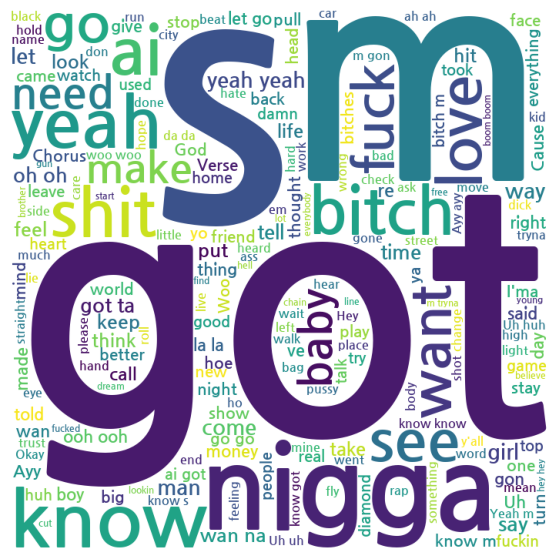

In [13]:
text = ' '.join(normalized_text)
wc = WordCloud(font_path = 'NanumGothicBold.ttf', width = 700, height = 700, background_color = 'white').generate(text)
#wc.to_file('wc/eng_pop_wc.png')
#wc.to_file('wc/eng_rock_wc.png')
#wc.to_file('wc/eng_folk_wc.png')
wc.to_file('wc/eng_hiphop_wc.png')
plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(wc)
plt.show()